In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

In [17]:
data = pd.read_csv('housing_dataset.csv')
data.head()

area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000

C:\Users\sidhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

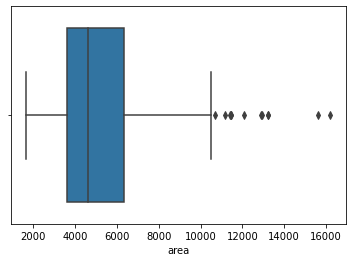

In [5]:
sns.boxplot(data['area'])

C:\Users\sidhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

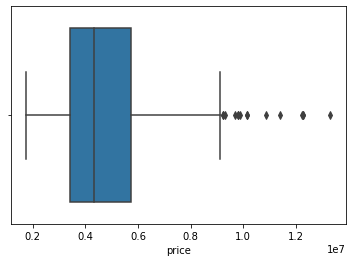

In [6]:
sns.boxplot(data['price'])

In [7]:
data.corr()

area     price
area   1.000000  0.535997
price  0.535997  1.000000

In [8]:
scaler = MinMaxScaler()
ndata = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
ndata

area     price
0    0.396564  1.000000
1    0.502405  0.909091
2    0.571134  0.909091
3    0.402062  0.906061
4    0.396564  0.836364
..        ...       ...
540  0.092784  0.006061
541  0.051546  0.001485
542  0.135395  0.000000
543  0.086598  0.000000
544  0.151203  0.000000

[545 rows x 2 columns]

In [9]:
X = ndata['area'].to_numpy().reshape(-1,1)
y = ndata['price'].to_numpy().reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.3990570766835111

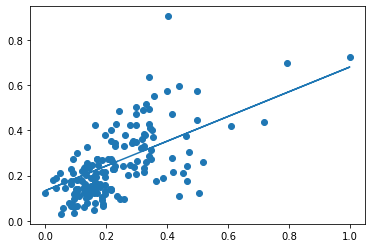

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

In [15]:
print(regressor.coef_, regressor.intercept_)

[[0.54744095]] [0.13360338]
